## Курсовая работа

Статистическое сопоставление цены биткоина с ценами других криптовалют по отношению к биткоину.

Датасет altcoin-14082022.csv составлен из TOP-100 криптовалютных проектов за исключением так называемых "стейлбкоинов" по стостоянию на 14 августа 2022 года. Стейлбкоин - криптовалютный актив, который поддерживает постоянный партитет к доллару США 1 к 1 финансовым, алгоритмическим или иным способом.

Такое множество можно называть выборкой из тысяч криптовалют.


Используемые признаки:
 - Цена 
 - Рыночная капитализация
 - Рыночый объем
 


In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams

In [2]:
data_df = pd.read_csv('altcoin-14082022.csv', sep=';')

In [3]:
data_df.head(10)

,Name,Price,MarketCap,Volume
0,Bitcoin,24319.330000,4.650244e+11,2.299413e+10
1,Ethereum,1936.800000,2.362229e+11,1.406275e+10
2,BNB,317.990000,5.130309e+10,9.361782e+08
3,Cardano,0.570300,1.935404e+10,1.180284e+09
4,XRP,0.376500,1.849850e+10,7.545127e+08
5,Solana,44.920000,1.566266e+10,1.061035e+09
6,Dogecoin,0.081690,1.083750e+10,1.530403e+09
7,Polkadot,8.960000,9.918526e+09,5.532815e+08
8,Shiba Inu,0.000017,9.285830e+09,3.873104e+09
9,Polygon,1.000000,8.042610e+09,5.450995e+08


In [35]:
data_df['Price'].describe()

count       92.000000
mean       600.754260
std       3564.822604
min          0.000001
25%          0.430050
50%          3.325000
75%         28.787500
max      24319.330000
Name: Price, dtype: float64

In [34]:
data_df['MarketCap'].describe()

count    9.200000e+01
mean     1.066011e+10
std      5.406646e+10
min      4.356413e+08
25%      6.064510e+08
50%      1.037861e+09
75%      3.047222e+09
max      4.650244e+11
Name: MarketCap, dtype: float64

In [32]:
data_df['Volume'].describe()

count    9.200000e+01
mean     6.383494e+08
std      2.802962e+09
min      2.371349e+06
25%      3.029786e+07
50%      8.908889e+07
75%      2.718066e+08
max      2.299413e+10
Name: Volume, dtype: float64

Несмещенная оценка математического ожидания:

In [4]:
M_pr = data_df['Price'].mean()
M_mc = data_df['MarketCap'].mean()
M_vl = data_df['Volume'].mean()
M_pr, M_mc, M_vl

(600.7542602315218, 10660105806.349022, 638349356.9382608)

Среднее квадратичное отклонение

In [5]:
data_df['Price'].var(ddof=1), data_df['MarketCap'].var(ddof=1), data_df['Volume'].var(ddof=1)

(12707960.196390247, 2.9231824190721837e+21, 7.856593721340014e+18)

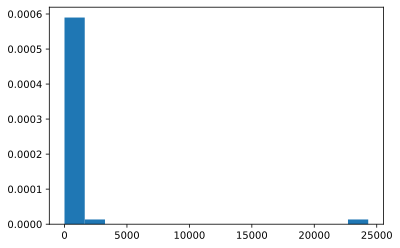

In [6]:
plt.hist(data_df['Price'], density=True, bins=15)
plt.show()

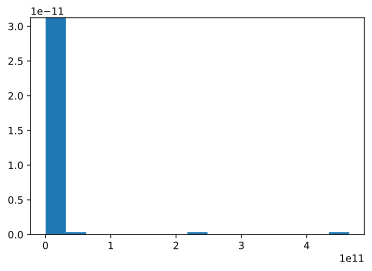

In [7]:
plt.hist(data_df['MarketCap'], density=True, bins=15)
plt.show()

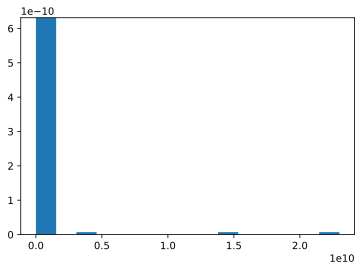

In [8]:
plt.hist(data_df['Volume'], density=True, bins=15)
plt.show()

#### На графиках нет характерной "куполообразной" фигуры из чего можно сделать вывод, что распределения ненормальны

#### Проведем тест на нормальность - тест Шапиро-Уилка
Нулевая гипотеза – данные распределены нормально, альтернативная гипотеза – данные не имеют нормального распределения.

In [56]:
stat, p = stats.shapiro(data_df['Price'])
print('Statistics=%.3f, p-value=%.20f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Гипотеза принимается')
print('Гипотеза отклоняется')

Statistics=0.155, p-value=0.00000000000000000001
Гипотеза отклоняется


In [10]:
stat, p = stats.shapiro(data_df['MarketCap'])
print('Statistics=%.3f, p-value=%.20f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Гипотеза принимается')
print('Гипотеза отклоняется')

Statistics=0.173, p-value=0.00000000000000000002
Гипотеза отклоняется


In [11]:
stat, p = stats.shapiro(data_df['Volume'])
print('Statistics=%.3f, p-value=%.20f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Гипотеза принимается')
print('Гипотеза отклоняется')

Statistics=0.206, p-value=0.00000000000000000005
Гипотеза отклоняется


#### Согласно тесту Шапиро-Уилка можно сделать вывод, что данные выборки не имеют стандартного нормальное распределение случайной величины

## Взаимосвязь величин. Показатели корреляции. Корреляционный анализ.

### Взаимосвязь величин
#### Выведем матрицу корреляций нашей выборки
Для ненормального распределения можно построить матрицу с использованием метода Спирмена

In [26]:
data_df[['Price', 'MarketCap', 'Volume']].corr(method='spearman')

,Price,MarketCap,Volume
Price,1.000000,0.204855,0.062058
MarketCap,0.204855,1.000000,0.604904
Volume,0.062058,0.604904,1.000000


Как мы видим, значения корреляции достаточно высоки только пары MarketCap и Volume

### Показатели корреляции

Так как распределения не являются нормальными для проверки показателей корреляции применим ранговую корреляцию Спирмена

In [46]:
X = data_df['Price']
Y = data_df['MarketCap']

In [47]:
coef, p = spearmanr(X, Y)
print ('Коэфициент корреляции Спирмена=%.3f, p-value=%.20f' % (coef, p))

Коэфициент корреляции Спирмена=0.205, p-value=0.05012899970774659097


#### Ранговая корреляция Спирмена составляет 0.205, значение p-value равно 0.05 (alpha) из чего можно сделать вывод, что корреляция не является статистически значимой?

In [51]:
X1 = data_df['Price']
Y1 = data_df['Volume']

In [52]:
coef, p = spearmanr(X1, Y1)
print ('Коэфициент корреляции Спирмена=%.3f, p-value=%.20f' % (coef, p))

Коэфициент корреляции Спирмена=0.062, p-value=0.55675316317124745602


#### Ранговая корреляция Спирмена составляет 0.062, значение p-value больше 0.05 (alpha) из чего можно сделать вывод, что корреляция не является статистически значимой

In [54]:
X2 = data_df['MarketCap']
Y2 = data_df['Volume']

In [55]:
coef, p = spearmanr(X2, Y2)
print ('Коэфициент корреляции Спирмена=%.3f, p-value=%.20f' % (coef, p))

Коэфициент корреляции Спирмена=0.605, p-value=0.00000000017018035289


#### Ранговая корреляция Спирмена составляет 0.605, значение p-value меньше 0.05 (alpha) из чего можно сделать вывод, что корреляция является статистически значимой

### Проверка на нормальность

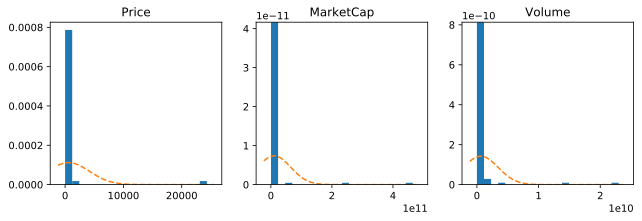

In [133]:
keys = ['Price', 'MarketCap', 'Volume']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(3.5 * len(keys), 3)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(data_df[key], density=True, bins=20)
    
    loc = data_df[key].mean()
    scale = data_df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

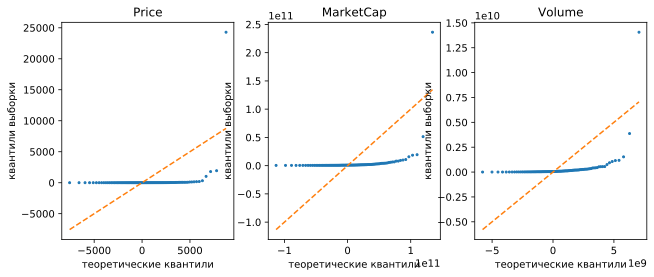

In [46]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(3.5 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = data_df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=4)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили', fontsize=10)
    ax.set_ylabel('квантили выборки', fontsize=10)

In [47]:
keys = ['Price', 'MarketCap', 'Volume']
for key in keys:
    print(key)
    
    samples = data_df[key]
    loc = samples.mean()
    scale = samples.std()
    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

Price
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9782608695652174
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9782608695652174
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9782608695652174

MarketCap
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9782608695652174
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9782608695652174
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9782608695652174

Volume
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.967391304347826
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9782608695652174
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9782608695652174



In [14]:
# stats.normaltest(samples)
#H0 - распределение нормально
alpha = 0.05
samples = data_df['Price']
stat, p = stats.normaltest(samples)
print('Statistics = ', round(stat, 3),  '\tp-value = ', p)
if p > alpha:
    print('Гипотеза принимается')
print('Гипотеза отклоняется')

Statistics =  156.071 	p-value =  1.2870599461238046e-34
Гипотеза отклоняется


In [13]:
# stats.normaltest(samples)
#H0 - распределение нормально
alpha = 0.05
samples = data_df['MarketCap']
stat, p = stats.normaltest(samples)
print('Statistics = ', round(stat, 3),  '\tp-value = ', p)
if p > alpha:
    print('Гипотеза принимается')
print('Гипотеза отклоняется')

Statistics =  171.162 	p-value =  6.803095852287215e-38
Гипотеза отклоняется


In [18]:
# stats.normaltest(samples)
#H0 - распределение нормально
alpha = 0.05
samples = data_df['Volume']
stat, p = stats.normaltest(samples)
print('Statistics = ', round(stat, 3),  '\tp-value = ', p)
if p > alpha:
    print('Гипотеза принимается')
print('Гипотеза отклоняется')

Statistics =  162.753 	p-value =  4.555962753504812e-36
Гипотеза отклоняется


### все проведенные тесты говорят о том, что распределения ненормальны

## Линейная регрессия.

#### модель регрессии — модель зависимости (объясняемой) количественной переменной от другой или нескольких других переменных (факторов) 

Найдём коэффициенты линейной регрессии:

In [51]:
x1 = data_df['MarketCap']
y1 = data_df['Price']

In [52]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)

b0, b1

(146.08747002965504, 4.265124553745734e-08)

Модель линейной регрессии имеет вид:
$$y = 146.08747002965504 + 0.000000042651 \cdot x,$$
т.е. с увеличением стоимости на $1$ доллар капитализация  возрастет  на $0.000000042651$ тысячи долларов. Визуализируем полученные результаты на графике.

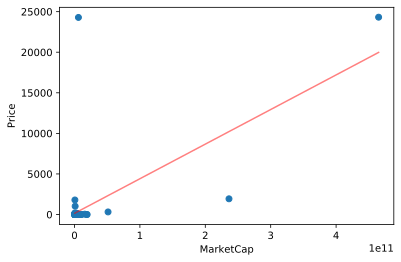

In [53]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('MarketCap')
plt.ylabel('Price');

In [54]:
x2 = data_df['Volume']
y2 = data_df['Price']

In [55]:
b1_2 = (np.mean(x2 * y2) - np.mean(x2) * np.mean(y2)) / (np.mean(x2 ** 2) - np.mean(x2) ** 2)
b0_2 = np.mean(y2) - b1_2 * np.mean(x2)

b0_2, b1_2

(104.78419956704766, 7.769570929675784e-07)

Модель линейной регрессии имеет вид:
$$y = 104.78419956704766 + 0.000000776957\cdot x,$$
т.е. с увеличением стоимости на $1$ доллар объем торгов возрастет  на $0.000000776957$ тысячи долларов. Визуализируем полученные результаты на графике.

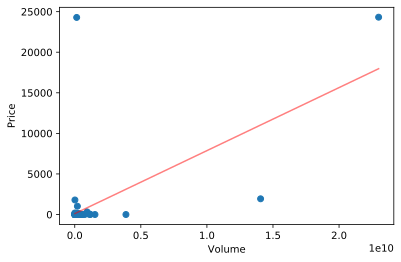

In [56]:
ox = x2
oy = b0_2 + b1_2 * ox

plt.scatter(x2, y2)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Volume')
plt.ylabel('Price');

#### Коэффициент детерминации

Расчитаем коэффициент детерминации с помощью которого можно определить качество модели. Коэффициент детерминации принимает значения из интервала [0,1]. Близкие к 1 значения коэффициента детерминации свидетельствуют о высоком качестве модели.

In [57]:
z1 = b0 + b1 * x1

In [58]:
def sum_of_squares(data):
    return ((data - data.mean()) ** 2).sum()

In [59]:
R1 = 1 - ((y1 - z1)**2).sum() / sum_of_squares(y1)
print(f'коэффициент детерминации: {R1}')

коэффициент детерминации: 0.4184499389244152


In [60]:
z2 = b0_2 + b1_2 * x2
R2 = 1 - ((y2 - z2)**2).sum() / sum_of_squares(y2)
print(f'коэффициент детерминации: {R2}')

коэффициент детерминации: 0.37320935490113694


#### Коэффициенты детерминации не очень высоки, но не близки к нулю, поэтому можно говорить о неплохом качестве построенных моделей

### Проверим значимость уравнений регрессии, построенных в первом и втором случаях

In [61]:
n = x1.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 90)

Критическая область:

In [62]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t

3.946875730680534

Критическая область:
$$\Omega_\alpha = \left( 3.946875730680534, \infty \right)$$

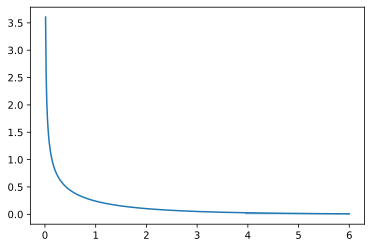

In [63]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

# plt.ylim(0, 0.5)

Считаем значение статистики:

In [64]:
F = (R1 / k1) / ((1 - R1) / k2)
F

64.75881789702466

#### Статистика попала в критическую область, уравнение регрессии признаётся значимым.

In [65]:
n = x2.shape[0]
m = 1

k3 = m
k4 = n - m - 1

k3, k4

(1, 90)

In [66]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k3, k4)
t

3.946875730680534

In [67]:
F = (R1 / k1) / ((1 - R1) / k2)
F

64.75881789702466

In [68]:
x2 = data_df[['MarketCap', 'Volume']].values
y2 = data_df['Price'].values


К матрице 𝑋 (массив x2) нужно также добавить столбец из 1, соответствующий фиктивному фактору.

In [69]:
x2.shape, y2.shape

((92, 2), (92,))

In [70]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
x2.shape

(92, 3)

Запишем матрицу 𝑋⊤𝑋 и посчитаем её определитель.

In [71]:
XTX = x2.T.dot(x2)
np.linalg.det(XTX)

5.224968435154309e+44

Определитель не близок к нулю, поэтому проблем с методом нет. Коэффициенты модели:

In [72]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[ 2.51136833e+02  9.97086138e-08 -1.11739275e-06]


Модель регрессии имеет вид:
𝑦=251,1368−0,000000994⋅𝑥1+0,000001117⋅𝑥2,
где 𝑥1 — капитализация, 𝑥2 — объем торгов.

Также посчитаем коэффициент деретминации

In [73]:
z2 = x2.dot(b)

In [74]:
R2 = 1 - ((y2 - z2)**2).sum() / sum_of_squares(y2)
R2

0.4415011101268057

Проверим значимость уравнения регрессии

In [75]:
n = x2.shape[0]
m = x2.shape[1] - 1  # поскольку добавляли фиктивный столбец

k1 = m
k2 = n - m - 1

k1, k2

(2, 89)

Критическая область:

In [76]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.098869718424344

Статистика:

In [77]:
F = (R2 / k1) / ((1 - R2) / k2)
F

35.177866521997224

#### Статистика попала в критическую область, уравнение регрессии признаётся значимым.

### Доверительные интервалы для коэффициентов парной регрессии

Доверительные интервалы позволяют оценить реальный вклад каждого фактора в итоговую переменную. Если доверительный интервал коэффициента содержит 0, это свидетельствует о том, что соответствующий фактор не вносит значимого вклада в переменную.

Ранее мы получили модель парной регрессии с коэффициентами:

In [78]:
b0, b1

(146.08747002965504, 4.265124553745734e-08)

Построим для коэффициента наклона доверительный интервал.

In [79]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [80]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

5.300078011922758e-09

Зададим уровень доверия 𝑝=0.95, т.е. 𝛼=0.05. Найдём нужный нам квантиль.

In [81]:
alpha = 0.05
n = x1.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2

(-1.9866745405784685, 1.9866745405784678)

Доверительный интервал для параметра 𝑏1:

In [82]:
(b1 + t1 * s_slope, b1 + t2 * s_slope)

(3.212171548809065e-08, 5.3180775586824025e-08)

Аналогично для параметра 𝑏0:

In [83]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [84]:
s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

290.54129249095695

Квантиль нам подойдёт тот же самый. Итак, доверительный интервал для параметра 𝑏0
:

In [85]:
(b0 + t1 * s_intercept, b0 + t2 * s_intercept)

(-431.12351874889134, 723.2984588082012)